# Calibrate a CdS Photoresistor

## Student Team: Replace the data below with yours!

* **Team number:** 999
* **Student A:** 
  * Name: Albert Einstein
  * MatNo: 123456
* **Student B:** 
  * Name: Bertrand Russell
  * MatNo: 654321
* **Student C:** 
  * Name: Carl Friedrich Gauss
  * MatNo: 314159


## Background
https://en.wikipedia.org/wiki/Photoresistor

In [145]:
import pandas as pd
import numpy as np
from numpy import log10
from numpy.random import normal
import matplotlib.pyplot as plt
# ipywidgets

## Simulate measurement data with white noise (Gaussian error)

In [140]:
def LDRmodel(lux, m=-0.57, b=2.71e4):
    return b*lux**m

In [142]:
LDRmodel(0.1)

100686.04708533375

In [134]:
log10(LDR(0.1))

5.002969290874406

**Voltage Divider**

In [143]:
def V1(V0,R1=1.e3,R2=1.e3):
    return(R1/(R1+R2)*V0)

In [144]:
V1(3)

1.5

In [135]:
lux_log = np.arange(-1.,3.001,0.5)

In [136]:
err = normal(loc=0.0, scale=0.1, size=len(lux_log))

In [137]:
LDRerr = 10**(log10(LDR(lux))+err)
luxerr = 10**(log10(lux)+err)

ValueError: operands could not be broadcast together with shapes (41,) (9,) 

In [129]:
luxerr2 = normal(loc=lux, scale=0.2*lux)

ValueError: operands could not be broadcast together with shapes (41,) (9,) 

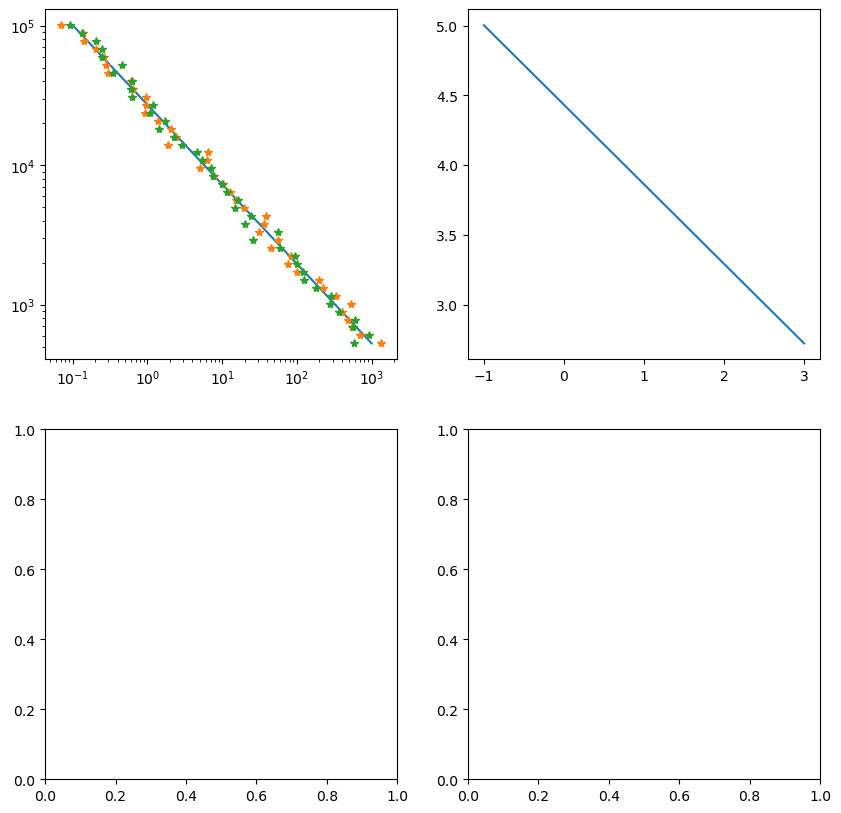

In [130]:
fig1,ax1 = plt.subplots(2,2, figsize=(10,10))
[[ax11, ax12],[ax21, ax22]] = ax1
#[ax11, ax12] = ax1

ax11.loglog(lux,LDR(lux))
#ax11.loglog(lux,LDRerr,"*")
ax11.loglog(luxerr,LDR(lux),"*")
ax11.loglog(luxerr2,LDR(lux),"*")

ax12.plot(log10(lux),log10(LDR(lux)))
ax12.plot(log10(lux),log10(LDR(lux))+err,"*")

ax11.grid(True)
ax12.grid(True)

ax21.plot(lux,LDR(lux))
ax21.plot(luxerr2,LDR(lux),"*")

ax22.plot(lux,LDR(lux))
ax22.plot(lux,LDRerr,"*")

plt.plot()

In [72]:
10**(log10(LDR(lux))+err)

array([70531.18479528, 95557.97749877, 69579.6722164 , 70536.96672918,
       62694.76494535, 46528.04391103, 34435.37475961, 48317.19397368,
       35305.52267749, 37416.35889399, 26259.60506179, 17548.66812305,
       18038.12876347, 18895.63134934, 15227.12672303,  8323.16173347,
       20088.7929361 , 13548.65243789,  7503.80159597,  8187.28548172,
        7418.52267286,  6459.0224067 ,  5453.26651579,  4837.791301  ,
        6733.85031817,  4340.63676914,  2592.66115194,  3288.49670599,
        1847.90669476,  2380.55854613,  1509.3799879 ,  1383.95944125,
        1862.33616081,  1505.71277788,  1566.70113336,  1719.60903365,
         905.33408453,   757.6748053 ,   599.39222959,   523.70511549,
         713.88566704])

In [88]:
normal(loc=[0, 100], scale=[0.1, 10])

array([8.42418475e-02, 1.08865165e+02])

In [108]:
data = \
'''
X, Y
a, v
2, 4
'''

In [110]:
from io import StringIO
dataIO = StringIO(data)

In [111]:
pd.read_csv(dataIO)

,X,Y
0,a,v
1,2,4


In [118]:
df = pd.read_csv("data.txt", index_col=0)
df

,Y
X,
1.0,1.0
2.0,4.0
3.0,9.0


<AxesSubplot: xlabel='X'>

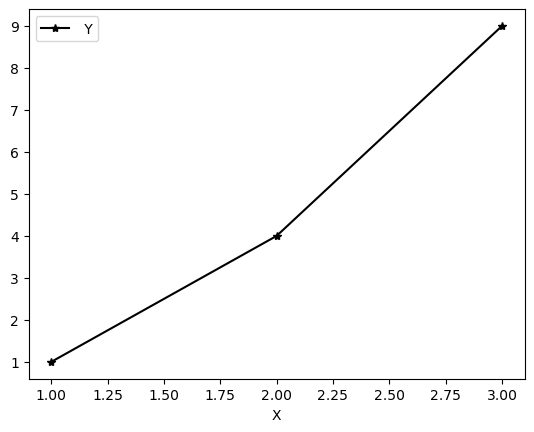

In [125]:
df.plot(style="-*", color="k")